<a href="https://colab.research.google.com/github/leejunho12316/HonGongMachine/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_7_1_%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


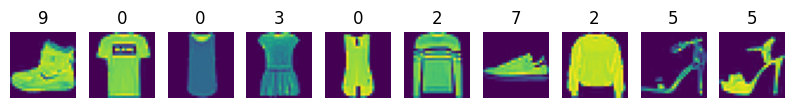

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

num = 10
fig, axs = plt.subplots(1, num, figsize = (10,10))

for i in range(num):
  axs[i].imshow(train_input[i])
  axs[i].set_title(train_target[i])
  axs[i].axis('off')
plt.show()

print(np.unique(train_target, return_counts=True))

In [ ]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28 * 28)
train_scaled.shape

(60000, 784)

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter = 5, random_state = 42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs = -1)
print(scores['test_score'])


[0.82983333 0.81991667 0.82033333 0.80808333 0.81891667]


In [ ]:
sc.fit(train_scaled, train_target)
print(sc.coef_, sc.intercept_)

[[-8.74951957e-04  1.92107937e-02  6.91828200e-02 ... -3.49389693e-01
  -1.63375331e-01  1.92751346e-02]
 [-7.05539309e-07  6.29144136e-04 -1.55173885e-03 ... -2.68133437e-02
   4.09954927e-02 -1.91850098e-02]
 [-1.81360982e-03  2.08242149e-03 -1.04759210e-03 ...  1.37819582e+00
   5.50204902e-01  1.70698506e-01]
 ...
 [-1.41103109e-10 -5.24770399e-09 -2.18042698e-05 ...  1.42690905e-02
   7.94636790e-02 -2.72460149e-03]
 [-3.19773754e-04 -1.18882394e-02 -8.28190923e-02 ... -5.11115047e-01
  -2.59770261e-01 -8.85680842e-02]
 [-3.04194036e-08  1.85425233e-03  1.78907387e-03 ...  2.21238284e-01
   3.59218218e-01  5.90155144e-02]] [ -1.83091535  -6.92121787  -3.21044291  -1.44763913 -20.24300412
   4.8197578   -1.45465726  -2.14167398 -17.43640267 -94.2579887 ]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


#딥러닝

In [ ]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2 ,random_state = 42)

In [ ]:
from tensorflow import keras

dense = keras.layers.Dense(10, activation = 'softmax', input_shape = (784,))
model = keras.Sequential([dense])
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Expected `metrics` argument to be a list, tuple, or dict. Received instead: metrics=accuracy of type <class 'str'>